## 환경설정

1. http://braincrew2.iptime.org:8001 에 접속하여 회원가입해 주세요. (비밀번호는 단순하게 기입하시는 것을 권장 드려요. 예. 1234)
2. `username` 에 이메일 형식의 아이디를 기입해 주세요.
3. `password` 에 비밀번호를 기입해 주세요.


In [8]:
project = "CATSvsDOGS"  # 수정하지 마세요
username = ""  # 이메일아이디 (예시. abc@hello.com)
password = ""  # 비밀번호

아래의 코드를 순서대로 실행해 주세요.


In [9]:
import os
import requests

if not os.path.exists("competition.py"):
    url = "https://link.teddynote.com/COMPT"
    file_name = "competition.py"
    response = requests.get(url)
    with open(file_name, "wb") as file:
        file.write(response.content)

아래 코드를 실행하여 데이터를 다운로드 받습니다.


In [10]:
import competition

# 파일 다운로드
# competition.download_competition_files("MNIST")
competition.download_competition_files(
    f"https://link.teddynote.com/{project}", use_competition_url=False
)

100%|██████████| 200M/200M [00:12<00:00, 15.7MiB/s]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

# Data 경로 설정
DATA_DIR = "data"

# 경고 무시
warnings.filterwarnings("ignore")

SEED = 123

## 데이터 로드


In [13]:
test = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
test.head(10)

,file_id
0,0027c755-7f39-4.jpg
1,002c9b55-8994-4.jpg
2,008839c4-1a01-4.jpg
3,00f48985-be69-4.jpg
4,01410bf4-c845-4.jpg
5,018e43f6-b8a7-4.jpg
6,01dbd9df-e52b-4.jpg
7,01f324aa-5b9b-4.jpg
8,01f4e753-eaa6-4.jpg
9,021e812a-0796-4.jpg


In [4]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

# 이미지 전처리 정의
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),  # 이미지 크기 조정
        transforms.ToTensor(),  # 이미지를 텐서로 변환
    ]
)

# ImageFolder를 사용하여 데이터셋 로드
train_dataset = datasets.ImageFolder(root="data/train", transform=transform)

# train / validation 비율 설정 (8:2)
train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size

# 데이터셋 분할
train_dataset, validation_dataset = random_split(
    train_dataset, [train_size, validation_size]
)

# DataLoader 인스턴스 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train'

In [ ]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)

In [ ]:
x, y = next(iter(validation_loader))
print(x.shape, y.shape)

In [ ]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader


class TestDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): csv 파일의 경로.
            root_dir (string): 모든 이미지 파일이 있는 디렉토리의 경로.
            transform (callable, optional): 샘플에 적용될 Optional transform.
        """
        self.test_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.test_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.test_frame.iloc[idx, 0])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image


# 이미지 전처리 정의
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),  # 이미지 크기 조정
        transforms.ToTensor(),  # 이미지를 텐서로 변환
    ]
)

# TestDataset 인스턴스 생성
test_dataset = TestDataset(
    csv_file="data/test.csv", root_dir="data/test", transform=transform
)

# DataLoader 인스턴스 생성
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
x = next(iter(test_loader))
print(x.shape)

## Label 확인


In [5]:
classes = train_dataset.dataset.classes
print(classes)

idx_to_class = {v: k for k, v in train_dataset.dataset.class_to_idx.items()}
print(idx_to_class)

NameError: name 'train_dataset' is not defined

## 시각화


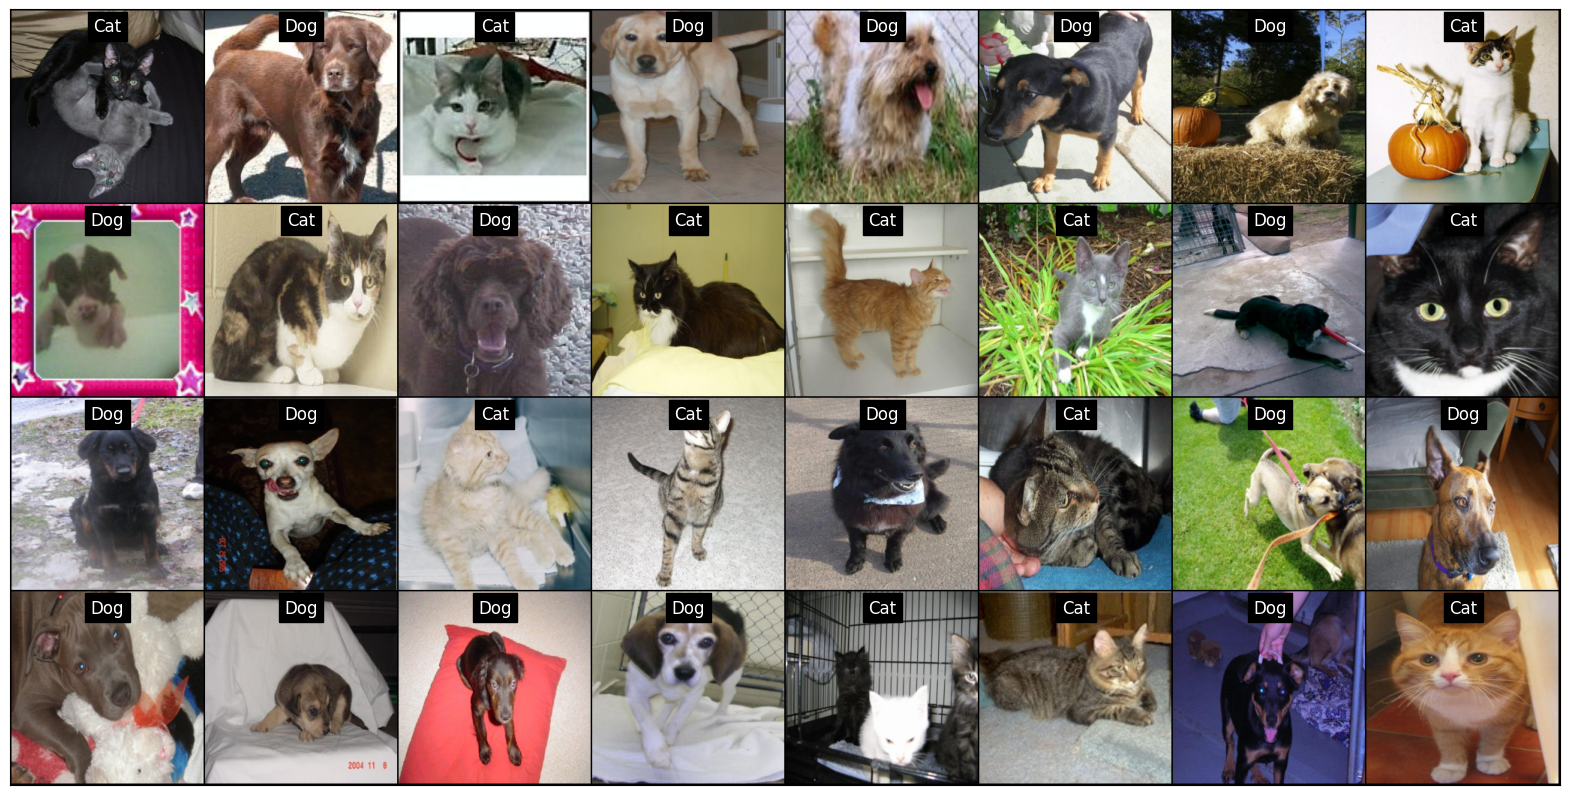

In [ ]:
import torchvision

# 한 배치의 이미지 시각화 함수 (사이즈 조정 포함)


def imshow(img, labels, classes):
    img = img.numpy().transpose((1, 2, 0))
    plt.figure(figsize=(20, 20))  # 여기에서 플롯의 크기를 조정
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    # 이미지마다 클래스 레이블을 타이틀로 표시
    for i, label in enumerate(labels):
        x = (i % 8) * (img.shape[1] / 8) + (img.shape[1] / 16)
        y = (i // 8) * (img.shape[0] / 4) + 10  # 4 rows
        plt.text(
            x,
            y,
            classes[label],
            ha="center",
            va="top",
            color="white",
            fontsize=12,
            backgroundcolor="black",
        )
    plt.show()


# 데이터 로더에서 한 배치 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 그리드 만들기
img_grid = torchvision.utils.make_grid(images, nrow=8)  # 8개의 이미지를 한 줄에 표시

# 이미지와 레이블 시각화
imshow(img_grid, labels, classes)

## 모델 정의


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import time

# CUDA 사용 가능 여부 확인
if torch.backends.mps.is_built():
    # mac os mps 지원 체크
    device = torch.device("mps" if torch.backends.mps.is_built() else "cpu")
else:
    # cuda 사용 가능한지 체크
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# VGG16 모델 로드 및 수정
model = models.vgg16(weights=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 90.4MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# 가중치를 Freeze 하여 학습시 업데이트가 일어나지 않도록 설정합니다.
for param in model.parameters():
    param.requires_grad = False  # 가중치 Freeze

In [ ]:
# 분류기 부분을 현재 데이터셋에 맞게 조정
model.classifier = nn.Sequential(
    nn.Linear(25088, 256), # 25088
    nn.ReLU(inplace=True),
    nn.Dropout(0.5, inplace=False),
    nn.Linear(256, 32),
    nn.ReLU(inplace=True),
    nn.Linear(32, 2),
)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model = model.to(device)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# 옵티마이저를 정의합니다. 옵티마이저에는 model.parameters()를 지정해야 합니다.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실함수(loss function)을 지정합니다. Multi-Class Classification 이기 때문에 CrossEntropy 손실을 지정하였습니다.
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm


def fit(model, data_loader, loss_fn, optimizer, device, phase="train"):
    if phase == "train":
        # 모델을 훈련모드로 설정합니다. training mode 일 때 Gradient 가 업데이트 됩니다. 반드시 train()으로 모드 변경을 해야 합니다.
        model.train()
    else:
        # model.eval()은 모델을 평가모드로 설정을 바꾸어 줍니다.
        model.eval()

    # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
    running_loss = 0
    corr = 0

    # 예쁘게 Progress Bar를 출력하면서 훈련 상태를 모니터링 하기 위하여 tqdm으로 래핑합니다.
    prograss_bar = tqdm(data_loader, leave=False)

    # mini-batch 학습을 시작합니다.
    for img, lbl in prograss_bar:
        # image, label 데이터를 device에 올립니다.
        img, lbl = img.to(device), lbl.to(device)

        optimizer.zero_grad()
        # 누적 Gradient를 초기화 합니다.
        with torch.set_grad_enabled(phase == "train"):

            # Forward Propagation을 진행하여 결과를 얻습니다.
            output = model(img)

            # 손실함수에 output, label 값을 대입하여 손실을 계산합니다.
            loss = loss_fn(output, lbl)

            if phase == "train":
                # 오차역전파(Back Propagation)을 진행하여 미분 값을 계산합니다.
                loss.backward()

                # 계산된 Gradient를 업데이트 합니다.
                optimizer.step()

        # output 의 뉴런별 확률 값을 sparse vector 로 변환합니다.
        pred = output.argmax(axis=1)

        # 정답 개수를 카운트 합니다.
        corr += (lbl == pred).sum().item()

        # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
        running_loss += loss.item()

    # 누적된 정답수를 전체 개수로 나누어 주면 정확도가 산출됩니다.
    acc = corr / len(data_loader.dataset)

    # 평균 손실(loss)과 정확도를 반환합니다.
    # train_loss, train_acc
    return running_loss / len(data_loader), acc

In [ ]:
import time

# 최대 Epoch을 지정합니다.
num_epochs = 5

min_loss = np.inf

STATE_DICT_PATH = "CATSvsDOGS-VGG16.pth"

# Epoch 별 훈련 및 검증을 수행합니다.
for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    start = time.time()
    train_loss, train_acc = fit(
        model, train_loader, loss_fn, optimizer, device, phase="train"
    )

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = fit(
        model, validation_loader, loss_fn, optimizer, device, phase="eval"
    )

    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(
            f"[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!"
        )
        min_loss = val_loss
        torch.save(model.state_dict(), STATE_DICT_PATH)

    time_elapsed = time.time() - start
    # Epoch 별 결과를 출력합니다.
    print(
        f"[Epoch{epoch+1:02d}] time: {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s \t loss: {train_loss:.5f}, acc: {train_acc:.5f} | val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}"
    )

[INFO] val_loss has been improved from inf to 0.11615. Saving Model!
[Epoch01] time: 0m 31s 	 loss: 0.15497, acc: 0.93875 | val_loss: 0.11615, val_acc: 0.95100


[INFO] val_loss has been improved from 0.11615 to 0.06464. Saving Model!
[Epoch02] time: 0m 31s 	 loss: 0.06190, acc: 0.97625 | val_loss: 0.06464, val_acc: 0.98000


[Epoch03] time: 0m 29s 	 loss: 0.04818, acc: 0.98200 | val_loss: 0.08364, val_acc: 0.97200


[Epoch04] time: 0m 30s 	 loss: 0.02748, acc: 0.98900 | val_loss: 0.08337, val_acc: 0.97500


[Epoch05] time: 0m 29s 	 loss: 0.01511, acc: 0.99450 | val_loss: 0.10549, val_acc: 0.97700


## 저장한 가중치 로드


In [ ]:
# 모델에 저장한 가중치를 로드합니다.
model.load_state_dict(torch.load(STATE_DICT_PATH))

<All keys matched successfully>

## 예측


In [ ]:
predictions = []
model = model.to(device)
# 검증모드 진입
model.eval()

with torch.no_grad():
    # loss 초기화
    running_loss = 0
    # 정확도 계산
    running_acc = 0
    for x in test_loader:
        x = x.to(device)

        y_hat = model(x)
        label = y_hat.argmax(dim=1).detach().item()
        predictions.append(label)

# 정답
your_answer = [idx_to_class[l] for l in predictions]

## 결과 제출

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)
- 제출결과는 [대회페이지](http://braincrew2.iptime.org:8001/competitions/ADVHOUSE/)의 `리더보드` 와 `제출` 탭에서 확인할 수 있습니다.


아래 Cell을 실행하여 예측 결과 업데이트


In [ ]:
import competition

# 예측 결과 업데이트
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["label"] = your_answer

display(submission)
competition.submit(project, username, password, submission)

,file_id,label
0,0027c755-7f39-4.jpg,Dog
1,002c9b55-8994-4.jpg,Cat
2,008839c4-1a01-4.jpg,Cat
3,00f48985-be69-4.jpg,Dog
4,01410bf4-c845-4.jpg,Cat
...,...,...
1242,ff5b40ac-31f5-4.jpg,Dog
1243,ff8c2907-ad6e-4.jpg,Dog
1244,ff925bc8-b61e-4.jpg,Dog
1245,ffdb87a2-e3ab-4.jpg,Cat


아이디:  sample@test.com
파일명:  submissions/20240227-093435-submission.csv
[제출에 성공하였습니다]
제출 결과: 0.9655172413793104
